# Trabajo Práctico N. ° 1: Análisis exploratorio de datos de TROCAFONE


In [1]:
# importacion general de librerias 
# y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 51)

In [2]:
# Cargamos los datos y miramos que tiene con un chequeo rápido

In [3]:
df = pd.read_csv('./data/events.csv')
df.tail(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011278,2018-06-11 12:25:40,ad campaign hit,ffffa8d1,/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011279,2018-06-11 12:25:41,generic listing,ffffa8d1,NaN,NaN,NaN,NaN,NaN,NaN,"6636,6593,7225,2820,6706,2750,12618,12604,1134...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011280,2018-06-11 12:28:47,searched products,ffffa8d1,NaN,NaN,NaN,NaN,NaN,NaN,"8541,8527,8513,9231,8555",s7 edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011281,2018-06-11 12:29:11,viewed product,ffffa8d1,NaN,"8,513.00",Samsung Galaxy S7 Edge,Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011282,2018-06-11 12:29:14,viewed product,ffffa8d1,NaN,"8,512.00",Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,"8,512.00",Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,"8,527.00",Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,"8,527.00",Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Transformación de datos

Se chequea el tipo de dato asignado a los datos importados y se hacen las transformaciones convenientes.

In [4]:
# Chequeo tipos de datos
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [5]:
# Transformo los datos al tipo que corresponda (por defecto todo vino como object)

# Timestamp de fecha
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Tipos categóricos
df.event = pd.Categorical(df.event)
df.condition = pd.Categorical(df.condition)
df.search_engine = pd.Categorical(df.search_engine)
df.channel = pd.Categorical(df.channel)
df.new_vs_returning = pd.Categorical(df.new_vs_returning)
df.country = pd.Categorical(df.country)
df.device_type = pd.Categorical(df.device_type)

#df['screen_width'] = df['screen_resolution'].str.split('x', expand=True)[0]
#df['screen_height'] = df['screen_resolution'].str.split('x', expand=True)[1]

#df['screen_width'] = df['screen_width'].fillna(0)
#df['screen_height'] = df['screen_height'].fillna(0)

#df['screen_width'] = df['screen_width'].astype(int)
#df['screen_height'] = df['screen_height'].astype(int)

df.dtypes

timestamp                   datetime64[ns]
event                             category
person                              object
url                                 object
sku                                 object
model                               object
condition                         category
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                     category
channel                           category
new_vs_returning                  category
city                                object
region                              object
country                           category
device_type                       category
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

In [6]:
df.tail()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1011283,2018-06-11 12:31:49,checkout,ffffa8d1,NaN,"8,512.00",Samsung Galaxy S7 Edge,Muito Bom,32GB,Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011284,2018-06-04 23:18:03,visited site,ffffac8a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Unknown,Unknown,Brazil,Smartphone,320x534,Android 6,Chrome Mobile 39
1011285,2018-06-04 23:18:03,ad campaign hit,ffffac8a,/comprar/samsung/galaxy-s7-edge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011286,2018-06-04 23:18:03,viewed product,ffffac8a,NaN,"8,527.00",Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011287,2018-06-04 23:18:10,checkout,ffffac8a,NaN,"8,527.00",Samsung Galaxy S7 Edge,Bom,32GB,Prata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Count devuelve por cada columna la cantidad de valores no nulos 
data_count = df.count()

In [8]:
# Lo devuelto por count es una Serie
type (data_count)

pandas.core.series.Series

In [9]:
# Shape me dice el tamaño del dataframe en (filas, columnas)
df.shape

(1011288, 23)

Text(0,0.5,'Valores no nulos')

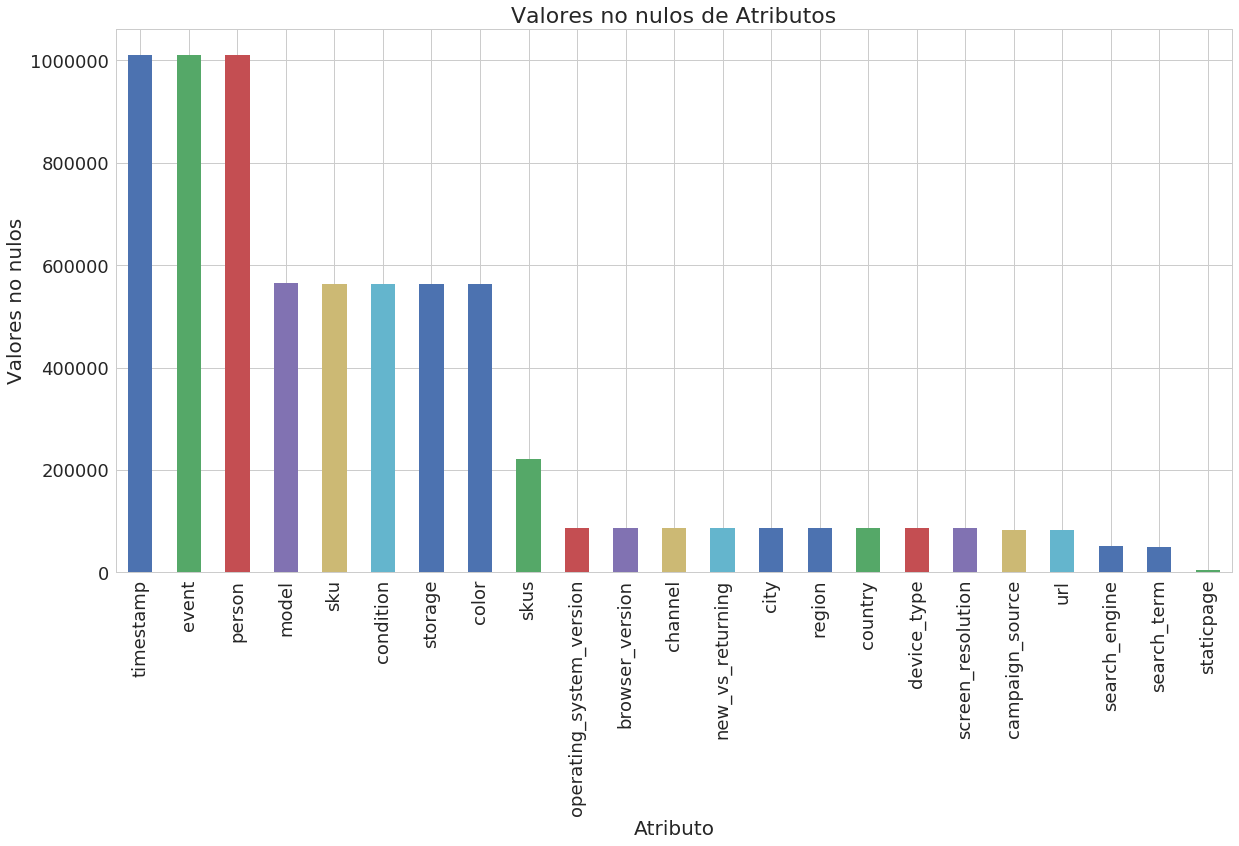

In [10]:
plot_data_count = data_count.sort_values(ascending=False).plot.bar(figsize=(20,10), fontsize=18)
plot_data_count.set_title("Valores no nulos de Atributos", fontsize=22)
plot_data_count.set_xlabel("Atributo", fontsize=20)
plot_data_count.set_ylabel("Valores no nulos", fontsize=20)

Dado que el enunciado advierte que no todas las columnas se corresponden con todos los tipos de eventos, revisaremos qué columnas se corresponden con qué eventos en función de el gráfico anterior.

Text(0,0.5,'Ocurrencias')

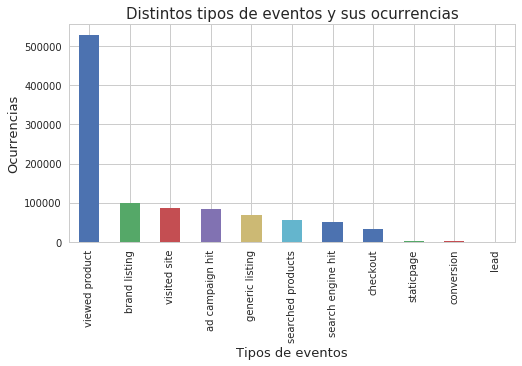

In [11]:
events = df['event']
event_counts = events.value_counts()
plot_events_counts = event_counts.plot.bar(figsize=(8,4), fontsize=10)
plot_events_counts.set_title("Distintos tipos de eventos y sus ocurrencias", fontsize=15)
plot_events_counts.set_xlabel("Tipos de eventos", fontsize=13)
plot_events_counts.set_ylabel("Ocurrencias", fontsize=13)

Text(0,0.5,'Ocurrencias')

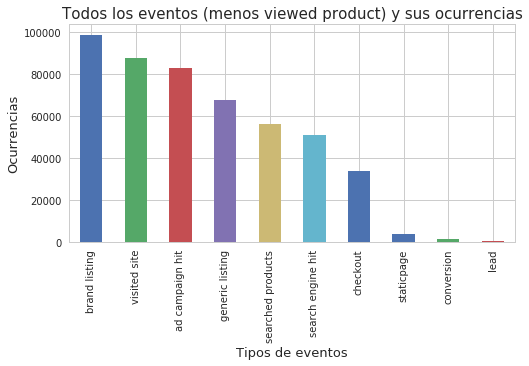

In [12]:
plot_events_counts = event_counts.drop(index='viewed product').plot.bar(figsize=(8,4), fontsize=10)
plot_events_counts.set_title("Todos los eventos (menos viewed product) y sus ocurrencias", fontsize=15)
plot_events_counts.set_xlabel("Tipos de eventos", fontsize=13)
plot_events_counts.set_ylabel("Ocurrencias", fontsize=13)

In [13]:
event_counts

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [32]:
def non_null_columns_for_event(event):
    X = df.loc[ df['event'] == event , : ]
    X = X.count()
    X = X[X!=0]
    Xp = X.plot.bar(figsize=(8,4), fontsize=10)
    Xp.set_title("Cantidad de valores distintos de null para cada atributo en el evento " + event, fontsize=10)
    Xp.set_xlabel("Nombre de atributo", fontsize=12)
    Xp.set_ylabel("Valores distinto de null", fontsize=12)
    return Xp

#### Evento viewed product

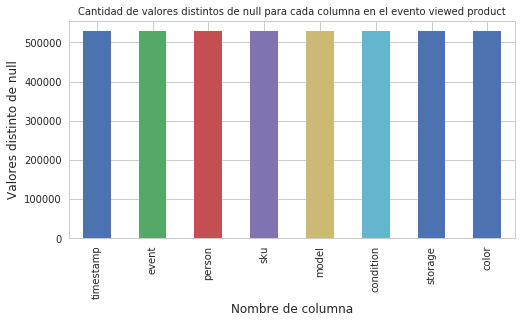

In [30]:
non_null_columns_for_event("viewed product")

Podemos observar que para este evento todas las columnas con valores distinto de null se presentan en igual cantidad, lo que significa que las columnas que se corresponden a ese evento son las que se listan en el gráfico.

#### Evento brand listing

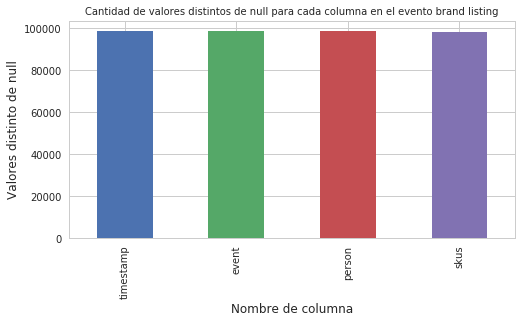

In [16]:
non_null_columns_for_event("brand listing")

Podemos observar que para este evento todas las columnas con valores distinto de null se presentan en igual cantidad, lo que significa que las columnas que se corresponden a ese evento son las que se listan en el gráfico.

#### Evento visited site

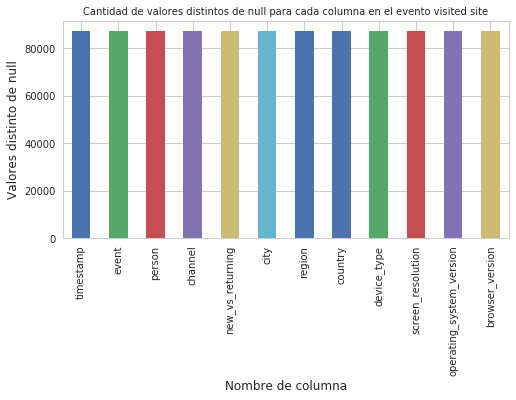

In [17]:
non_null_columns_for_event("visited site")

Podemos observar que para este evento todas las columnas con valores distinto de null se presentan en igual cantidad, lo que significa que las columnas que se corresponden a ese evento son las que se listan en el gráfico.

#### Evento ad campaign hit

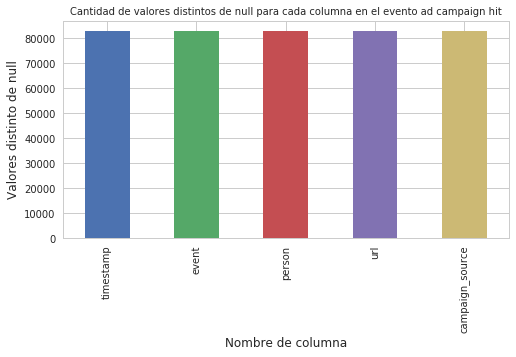

In [18]:
non_null_columns_for_event("ad campaign hit")

#### Evento generic listing

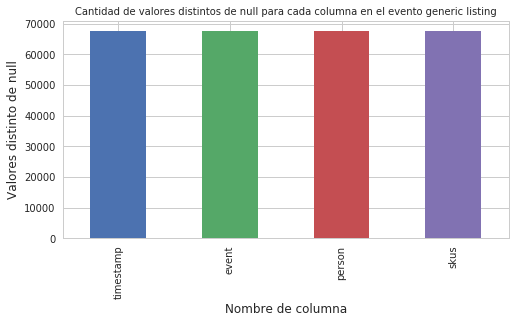

In [19]:
non_null_columns_for_event("generic listing")

#### Evento searched products

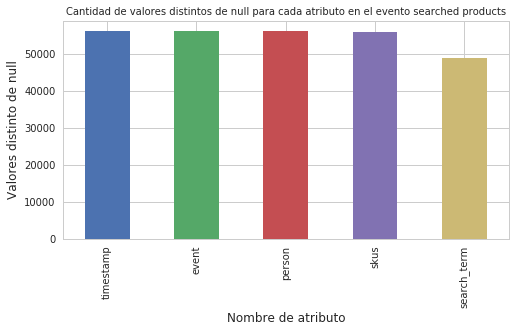

In [33]:
non_null_columns_for_event("searched products")

#### Evento search engine hit

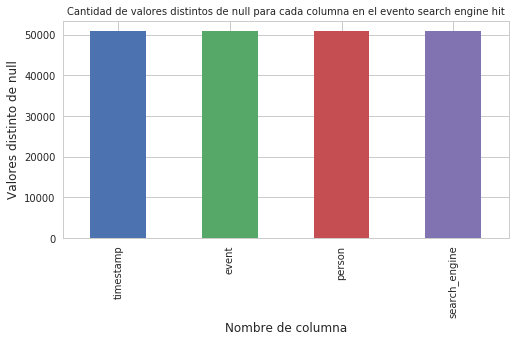

In [27]:
non_null_columns_for_event("search engine hit")

#### Evento checkout

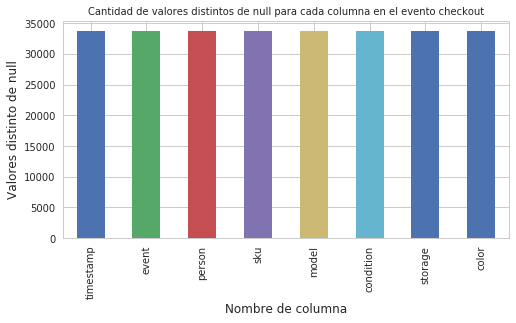

In [21]:
non_null_columns_for_event("checkout")

#### Evento staticpage

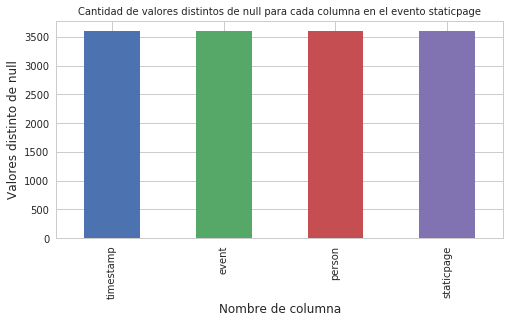

In [22]:
non_null_columns_for_event("staticpage")

#### Evento conversion

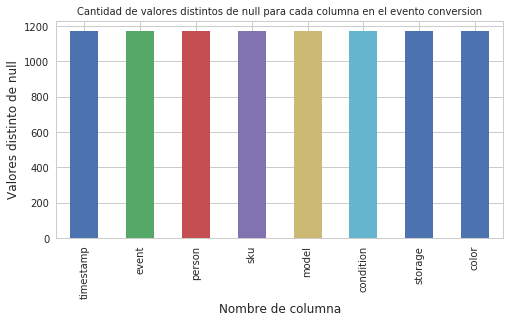

In [23]:
non_null_columns_for_event("conversion")

#### Evento lead

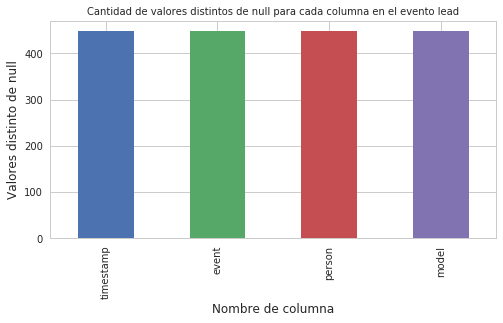

In [24]:
non_null_columns_for_event("lead")